**Author**: J W Debelius<br/>
**Date**:  6 March 2015<br/>
**virtualenv**: Playground

In [1]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

*In February, I tried to show my power curves work by simulating some normal data, and comparing the simulations with the actual data. I'm like to do this in a more formal way here, which will hopefully turn into something publishable, eventually*.

In [9]:
import numpy as np
import scipy
import skbio
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline

# 1. Traditional Power Methods

Power for a case II t test is based on the $z$ distribution. The formula is given as: [**citation needed**]
$PWR(\overline{x}_{1}, \overline{x}_{2}, s_{1}, s_{2}, n_{1}, n_{2}, \alpha) = P \left (Z < -z_{(1 - \alpha/2)} + \sqrt{\frac{(\overline{x}_{1} - \overline{x}_{2})^{2}}{s_{1}^{2}/n_{1} + s_{2}^{2}/n_{2}}} \right ) \tag{1}$
which can be simplified to
$PWR(\overline{x}_{1}, \overline{x}_{2}, s_{1}, s_{2}, n_{1}, n_{2}, \alpha) = pnorm \left (-z_{(1 - \alpha/2)} + \sqrt{\frac{(\overline{x}_{1} - \overline{x}_{2})^{2}}{s_{1}^{2}/n_{1} + s_{2}^{2}/n_{2}}}, 0, 1 \right ) \tag{2}$
where $prorm(x, 0, 1)$ is the probability density function at x for a normal distribution with mean 0 and standard devation 1.

If we assume that we're going to draw an equal number of samples at each depth
(so $n_{1} = n_{2}$), we can simplify the equation further:

$PWR(\overline{x}_{1}, \overline{x}_{2}, s_{1}, s_{2}, n, \alpha) = pnorm \left (-z_{(1 - \alpha/2)} + \sqrt{\frac{n(\overline{x}_{1} - \overline{x}_{2})^{2}}{s_{1}^{2} + s_{2}^{2}}}, 0, 1 \right ) \tag{2}$

We can translate this into a statistical power function:

In [4]:
def ttest_2_ind_pwr(n, mu1, mu2, sigma1, sigma2, alpha=0.05):
    """Calculates the stastical power for two independent normal distributions
    
    Parameters
    ----------
    n : array
        A 1 dimensional array giving the counts for power calculation.
    mu1, mu2 : float
        The means for the two distributions being compared.
    sigma1, sigma2 : float
        The standard deviations for the two distributions being compared.
    alpha : float, optional
        The critical value for the comparison.
    
    Returns
    -------
    beta : array
        The statistcal power at each sample count.
    
    """
    # Calculates the effect size for the comparison
    eff = (np.absolute(mu1 - mu2) / 
           np.sqrt(np.square(sigma1) + np.square(sigma2)))

    # Gets the z-distribution test statistic for alpha
    z_alpha = scipy.stats.norm.ppf(1 - alpha / 2)

    # Calculates the z-statistic distribution for beta
    beta = scipy.stats.norm.cdf(-z_alpha + eff * np.sqrt(n))
    
    return beta

# Distributions

We'll simulate two populations. For the sake of early comparisons, let's choose two distributions where the standard deviation is twice the difference in the means.

In [5]:
mu1 = 0
mu2 = 10
eff = 2
sigma = 2*(mu2 - mu1)

We can simulate the two distributions over a domain which will give us a complete picture.

In [6]:
domain = np.arange(-100, 100, 1)

39.1992796908


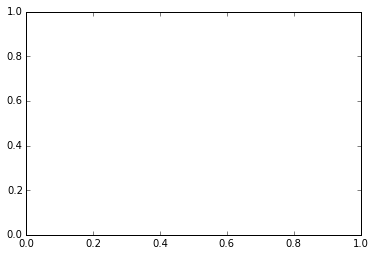

In [17]:
dist1 = scipy.stats.norm.pdf(domain, mu1, sigma)
dist2 = scipy.stats.norm.pdf(domain, mu2, sigma)
pop1_95 = mu1 + scipy.stats.norm.ppf(1 - 0.05/2)*sigma
print pop1_95

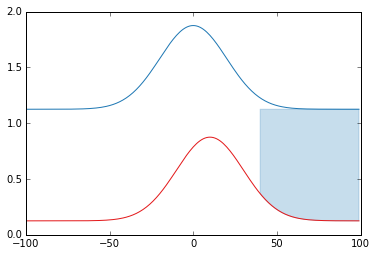

In [18]:
pop_ax = plt.axes()

dist1 = dist1/dist1.max()
dist2 = dist2/dist2.max()

pop_ax.plot(domain, 1.125 + dist1*0.75, color='#1f78b4')
pop_ax.plot(domain, 0.125 + dist2*0.75, color='#e31a1c')

pop_ax.fill_between(x=domain[domain > pop1_95],
                    y1=1.125, 
                    y2=dist2[domain > pop1_95]*0.75+0.125, 
                    alpha=0.25, color='#1f78b4')